In [1]:
import sys
print("Python executable:", sys.executable)
print("\nPython path:", sys.path)
print("\nWorking directory:", sys.path[0])

# Try importing
import rain_station
print("\nRain station package location:", rain_station.__file__)

Python executable: /home/udit/mambaforge/bin/python

Python path: ['/home/udit/Desktop/Data_MIR_students/PhD/Aman/Networks_rain_project/Projects/rain_station_data_network_python/notebooks', '/home/udit/mambaforge/lib/python310.zip', '/home/udit/mambaforge/lib/python3.10', '/home/udit/mambaforge/lib/python3.10/lib-dynload', '', '/home/udit/mambaforge/lib/python3.10/site-packages', '/home/udit/Desktop/Data_MIR_students/PhD/Aman/Networks_rain_project/Projects/rain_station_data_network_python/src']

Working directory: /home/udit/Desktop/Data_MIR_students/PhD/Aman/Networks_rain_project/Projects/rain_station_data_network_python/notebooks

Rain station package location: /home/udit/Desktop/Data_MIR_students/PhD/Aman/Networks_rain_project/Projects/rain_station_data_network_python/src/rain_station/__init__.py


In [3]:
from pathlib import Path
import os
from rain_station.data.interim_data_processor import SimpleStationProcessor

def get_data_directory() -> Path:
    """Get data directory that's parallel to Projects directory."""
    # Start from notebook location
    current_path = Path(os.getcwd())  # You're in notebooks/
    
    # Go up to Projects directory, then up to Networks_rain_project, then to data
    return current_path.parents[1].parents[0] / "data"

# Setup paths
data_dir = get_data_directory()
raw_data_path = data_dir / "raw"
interim_data_path = data_dir / "interim_Data"

print(f"Raw data path: {raw_data_path}")
print(f"Interim data path: {interim_data_path}")

# Create processor
processor = SimpleStationProcessor(raw_data_path, interim_data_path)

# Test with one file first
test_file = raw_data_path / "IN001010100.csv"
result = processor.process_station(test_file)
processor.save_station_data(result['metadata']['STATION'], result['data'])
print("Test file processed successfully!")

# If the test works, process all files
processor.process_all_stations()

INFO:rain_station.data.interim_data_processor:Found 3807 station files


Raw data path: /home/udit/Desktop/Data_MIR_students/PhD/Aman/Networks_rain_project/data/raw
Interim data path: /home/udit/Desktop/Data_MIR_students/PhD/Aman/Networks_rain_project/data/interim_Data
Test file processed successfully!


Processing stations:   0%|          | 0/3807 [00:00<?, ?it/s]

Processing stations:  33%|███▎      | 1245/3807 [00:40<01:10, 36.35it/s]/home/udit/Desktop/Data_MIR_students/PhD/Aman/Networks_rain_project/Projects/rain_station_data_network_python/src/rain_station/data/interim_data_processor.py:24: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
Processing stations:  67%|██████▋   | 2532/3807 [01:22<00:36, 35.26it/s]/home/udit/Desktop/Data_MIR_students/PhD/Aman/Networks_rain_project/Projects/rain_station_data_network_python/src/rain_station/data/interim_data_processor.py:24: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
Processing stations: 100%|██████████| 3807/3807 [02:04<00:00, 30.51it/s]
INFO:rain_station.data.interim_data_processor:Saved station metadata summary


Successfully loaded data from: /home/udit/Desktop/Data_MIR_students/PhD/Aman/Networks_rain_project/Projects/rain_station_data_network_python/../../data/interim_Data/station_metadata.csv

Date Range Statistics:
Earliest start date: 1901-01-01 00:00:00
Latest end date: 2025-01-27 00:00:00

Duration Statistics:
Average duration: 48.0 years
Min duration: 0.3 years
Max duration: 124.1 years

Total stations: 3807


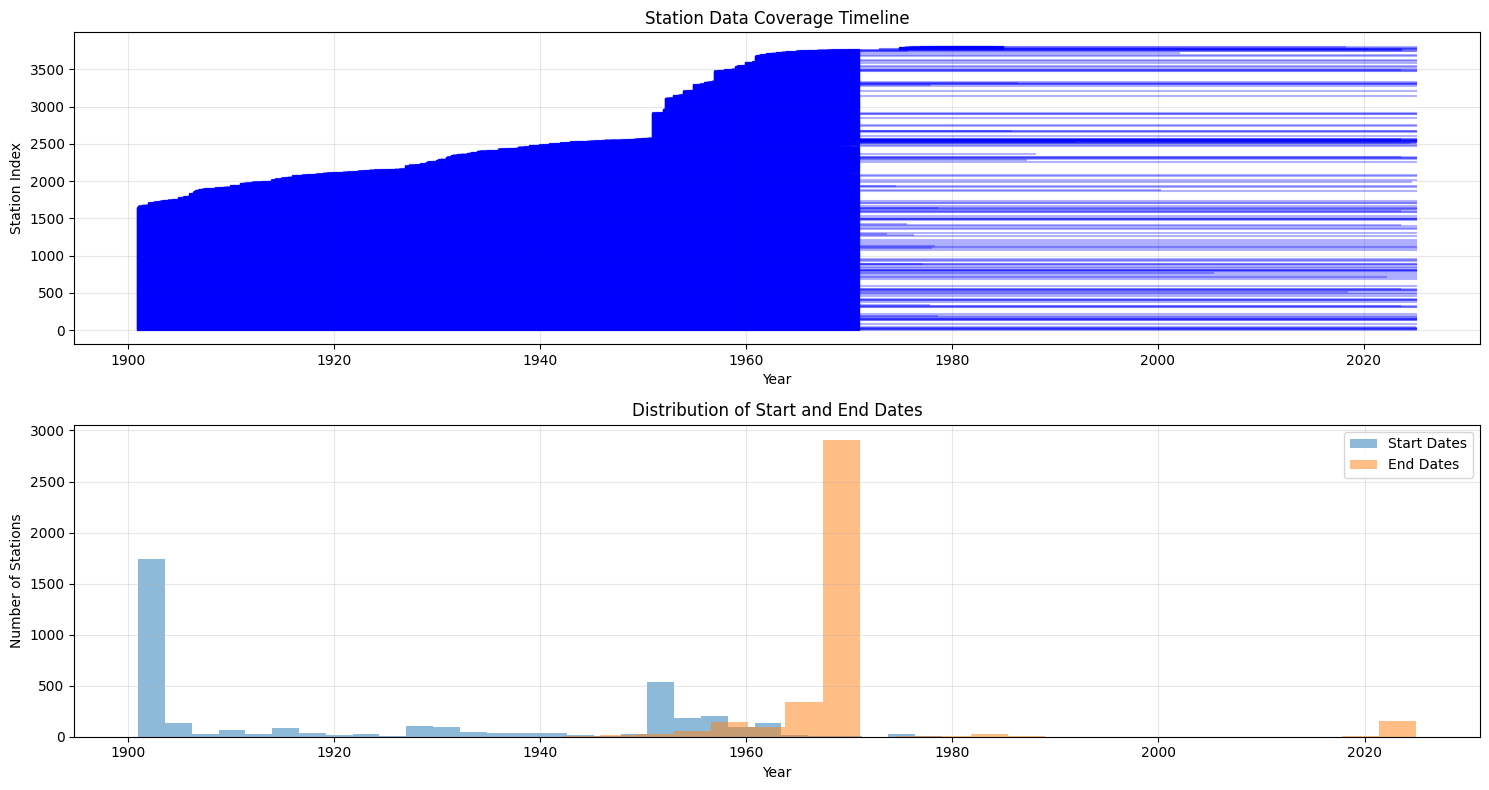


Periods with most station coverage:

Top 5 years by number of active stations:
1961    3447.0
1962    3443.0
1963    3418.0
1964    3392.0
1957    3378.0
dtype: float64

Analysis results saved to: /home/udit/Desktop/Data_MIR_students/PhD/Aman/Networks_rain_project/Projects/rain_station_data_network_python/../../data/processed/station_coverage_analysis.csv


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from rain_station.utils.path_manager import DataPathManager

# Initialize path manager
path_mgr = DataPathManager()

# Read the metadata using managed paths
metadata_path = path_mgr.get_path('interim_data') / "station_metadata.csv"

try:
    df = pd.read_csv(metadata_path)
    print(f"Successfully loaded data from: {metadata_path}")
except FileNotFoundError:
    raise FileNotFoundError(f"Station metadata not found at {metadata_path}. "
                          "Please ensure data is in the correct location as specified in config.yaml")

# Convert dates to datetime
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

# Calculate coverage duration in years
df['duration'] = (df['end_date'] - df['start_date']).dt.days / 365.25

# Basic statistics
print("\nDate Range Statistics:")
print(f"Earliest start date: {df['start_date'].min()}")
print(f"Latest end date: {df['end_date'].max()}")
print(f"\nDuration Statistics:")
print(f"Average duration: {df['duration'].mean():.1f} years")
print(f"Min duration: {df['duration'].min():.1f} years")
print(f"Max duration: {df['duration'].max():.1f} years")
print(f"\nTotal stations: {len(df)}")

# Create visualization
plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)

# Sort stations by start date for better visualization
df_sorted = df.sort_values('start_date')

# Plot timeline for each station
plt.plot([df_sorted['start_date'], df_sorted['end_date']], 
         [range(len(df)), range(len(df))], 
         'b-', alpha=0.3)

plt.title('Station Data Coverage Timeline')
plt.xlabel('Year')
plt.ylabel('Station Index')
plt.grid(True, alpha=0.3)

# Histogram of start and end dates
plt.subplot(2, 1, 2)
plt.hist(df['start_date'].dt.year, bins=30, alpha=0.5, label='Start Dates')
plt.hist(df['end_date'].dt.year, bins=30, alpha=0.5, label='End Dates')
plt.title('Distribution of Start and End Dates')
plt.xlabel('Year')
plt.ylabel('Number of Stations')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find common period with most stations
start_year_counts = df['start_date'].dt.year.value_counts().sort_index()
end_year_counts = df['end_date'].dt.year.value_counts().sort_index()

print("\nPeriods with most station coverage:")
common_years = range(int(df['start_date'].dt.year.min()), 
                    int(df['end_date'].dt.year.max()) + 1)
active_stations = pd.Series(index=common_years, dtype=int)

for year in common_years:
    active_stations[year] = len(df[(df['start_date'].dt.year <= year) & 
                                 (df['end_date'].dt.year >= year)])

print("\nTop 5 years by number of active stations:")
print(active_stations.sort_values(ascending=False).head())

# Save analysis results
results_path = path_mgr.get_path('processed_data') / "station_coverage_analysis.csv"
active_stations.to_csv(results_path)
print(f"\nAnalysis results saved to: {results_path}")